In [1]:
# Write a suitable example to demonstrate the perceptron learning law with its decision regions
# using python. Give the output in graphical form.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# Load the Iris dataset
iris = load_iris()

'''
# Accessing the feature data (X) and target data (y)
X = iris.data  # Features (attributes)
y = iris.target  # Target variable (class labels)

print(X[:5])  # Print first 5 rows
print('\n')
print(y[:5])  # Print first 5 elements'''

"\n# Accessing the feature data (X) and target data (y)\nX = iris.data  # Features (attributes)\ny = iris.target  # Target variable (class labels)\n\nprint(X[:5])  # Print first 5 rows\nprint('\n')\nprint(y[:5])  # Print first 5 elements"

In [9]:
#iris

In [6]:
# extract sepal length and petal length features 
X = iris.data[:, [0, 2]]      # zeroth and second column

y = iris.target

w = np.zeros(2) #[0.0 , 0.0]  # to give weightage

b = 0   # to shift the decision boundary

lr = 0.1  # learning rate

epochs = 50

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [10]:
#setosa is class 0, versicolor is class 1 
y = np.where(y == 0, 0, 1)

'''
np.where(condition, x, y)
condition: This is a boolean array or a condition that specifies the condition to be checked.
x: This is the value to be returned where the condition is True.
y: This is the value to be returned where the condition is False.
'''

'\nnp.where(condition, x, y)\ncondition: This is a boolean array or a condition that specifies the condition to be checked.\nx: This is the value to be returned where the condition is True.\ny: This is the value to be returned where the condition is False.\n'

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# define perceptron function 
def perceptron(x, w, b):
    # calculate weighted sum of inputs 
    z = np.dot(x, w) + b
    # apply step function
    return np.where(z >= 0, 1, 0)

In [13]:
# train the perceptron
for epoch in range(epochs): 
    for i in range(len(X)):
        x = X[i] 
        target = y[i]
        output = perceptron(x, w, b) 
        error = target - output  # the algorithm assigns more weight to features that contribute more to the error.
        w += lr * error * x  # The bias affects the decision boundary's position and allows for shifting it up or down without changing the weights.
        b += lr * error

#model train --- adjusted weights and bias 

# plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

'''
np.arange(x_min, x_max, 0.02) generates a 1D array of x-coordinates, starting from x_min, ending before x_max, with a step size of 0.02.
np.arange(y_min, y_max, 0.02) generates a 1D array of y-coordinates in a similar manner.
Then, np.meshgrid() takes these coordinate arrays and creates two 2D arrays, xx and yy, representing the x and y coordinates of each point in the grid defined by these arrays.
'''

Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

'''
These two lines of code compute the output of a perceptron model for each point in a grid defined by xx and yy. Here's a brief explanation:

np.c_[xx.ravel(), yy.ravel()]: This concatenates the flattened versions of xx and yy arrays column-wise, creating a 2D array where each row represents a point in the grid.
perceptron(np.c_[xx.ravel(), yy.ravel()], w, b): This computes the output of the perceptron model for each point in the grid using the weights w and bias b. The perceptron() function likely takes the input data and computes the output using a linear activation function.
Z = Z.reshape(xx.shape): This reshapes the output array Z to have the same shape as the grid defined by xx. Each value in Z corresponds to the output of the perceptron model at the corresponding point in the grid.
'''

"\nThese two lines of code compute the output of a perceptron model for each point in a grid defined by xx and yy. Here's a brief explanation:\n\nnp.c_[xx.ravel(), yy.ravel()]: This concatenates the flattened versions of xx and yy arrays column-wise, creating a 2D array where each row represents a point in the grid.\nperceptron(np.c_[xx.ravel(), yy.ravel()], w, b): This computes the output of the perceptron model for each point in the grid using the weights w and bias b. The perceptron() function likely takes the input data and computes the output using a linear activation function.\nZ = Z.reshape(xx.shape): This reshapes the output array Z to have the same shape as the grid defined by xx. Each value in Z corresponds to the output of the perceptron model at the corresponding point in the grid.\n"

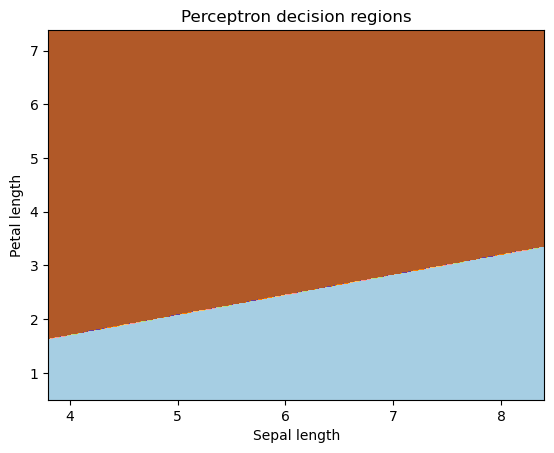

In [14]:
#plot decision boundary
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)      # alpha=0.2
plt.xlabel('Sepal length')
plt.ylabel('Petal length') 
plt.title('Perceptron decision regions') 
plt.show()

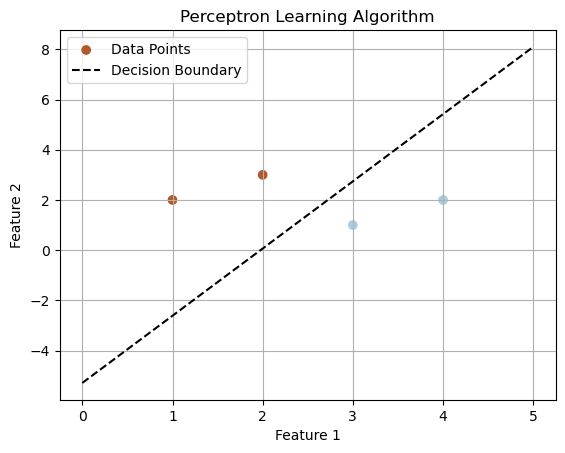

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define small dataset
X = np.array([[1, 2], [2, 3], [3, 1], [4, 2]])
y = np.array([1, 1, -1, -1])  # Class labels: 1 for class 1, -1 for class 2

# Initialize weights and bias
weights = np.random.randn(2)
bias = np.random.randn()

# Perceptron learning algorithm
learning_rate = 0.1
epochs = 5

for epoch in range(epochs):
    for i in range(len(X)):
        # Compute the prediction
        prediction = np.dot(X[i], weights) + bias
        
        # Update weights and bias
        if prediction * y[i] <= 0:
            weights += learning_rate * X[i] * y[i]
            bias += learning_rate * y[i]

# Plot the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label='Data Points')

# Plot the decision boundary (line)
x_decision = np.linspace(0, 5, 100)
y_decision = -(weights[0] * x_decision + bias) / weights[1]
plt.plot(x_decision, y_decision, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Learning Algorithm')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
x_decision

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [11]:
y_decision

array([-5.29067512, -5.15542478, -5.02017443, -4.88492409, -4.74967374,
       -4.6144234 , -4.47917306, -4.34392271, -4.20867237, -4.07342202,
       -3.93817168, -3.80292133, -3.66767099, -3.53242064, -3.3971703 ,
       -3.26191995, -3.12666961, -2.99141926, -2.85616892, -2.72091857,
       -2.58566823, -2.45041789, -2.31516754, -2.1799172 , -2.04466685,
       -1.90941651, -1.77416616, -1.63891582, -1.50366547, -1.36841513,
       -1.23316478, -1.09791444, -0.96266409, -0.82741375, -0.69216341,
       -0.55691306, -0.42166272, -0.28641237, -0.15116203, -0.01591168,
        0.11933866,  0.25458901,  0.38983935,  0.5250897 ,  0.66034004,
        0.79559039,  0.93084073,  1.06609107,  1.20134142,  1.33659176,
        1.47184211,  1.60709245,  1.7423428 ,  1.87759314,  2.01284349,
        2.14809383,  2.28334418,  2.41859452,  2.55384487,  2.68909521,
        2.82434555,  2.9595959 ,  3.09484624,  3.23009659,  3.36534693,
        3.50059728,  3.63584762,  3.77109797,  3.90634831,  4.04